Final Project

First: Data Cleaning. Convert Year to an integer type where possible.
Check for duplicates and remove them. Missing values inculde "Year" and "Publisher". Year: Missing values were filled with the median year. Publisher: Missing values were replaced with "Unknown."

In [2]:
# Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vg_sales = pd.read_csv('/Users/sophiaguo/Desktop/EMORY/senior/QTM 347/vgsales.csv')
vg_sales.head()
vg_sales.info()

duplicates = vg_sales.duplicated().sum()

# Handle missing values： “Year” and “Publisher”
vg_sales['Year'] = vg_sales['Year'].fillna(vg_sales['Year'].median())
vg_sales['Publisher'] = vg_sales['Publisher'].fillna('Unknown')
vg_sales['Year'] = vg_sales['Year'].astype(int)

cleaned_summary = {
    "Duplicates Removed": duplicates,
    "Missing Values (Post-Cleaning)": vg_sales.isnull().sum().to_dict(),
}

descriptive_stats = vg_sales.describe()

print("Data Cleaning Summary:", cleaned_summary)
print("Descriptive Statistics:", descriptive_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Data Cleaning Summary: {'Duplicates Removed': 0, 'Missing Values (Post-Cleaning)': {'Rank': 0, 'Name': 0, 'Platform': 0, 'Year': 0, 'Genre': 0, 'Publisher': 0, 'NA_Sales': 0, 'EU_Sales': 0, 'JP_Sales': 0, 'Other_Sales': 0, 'Global_Sales': 0}}
Descriptive Statistics:    

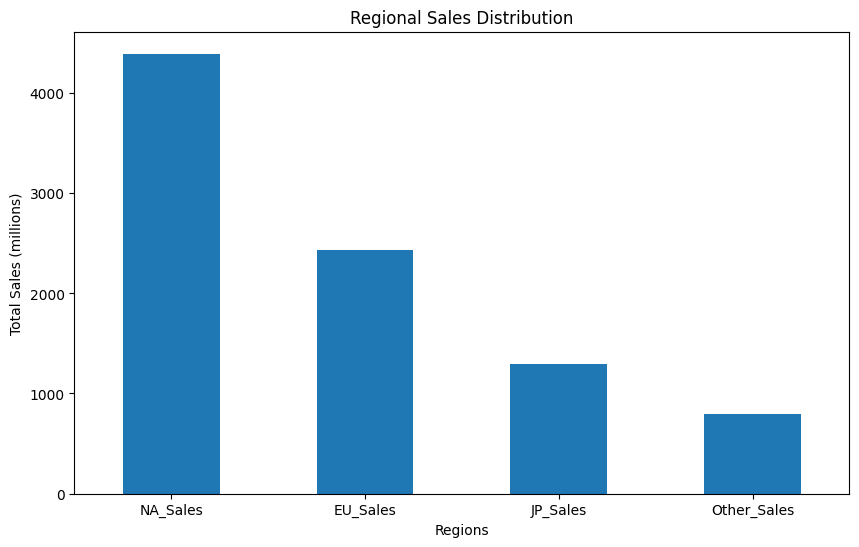

In [3]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = vg_sales[regions].sum()

# Plot Regional Sales Distribution
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title("Regional Sales Distribution")
plt.xlabel("Regions")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=0)
plt.show()

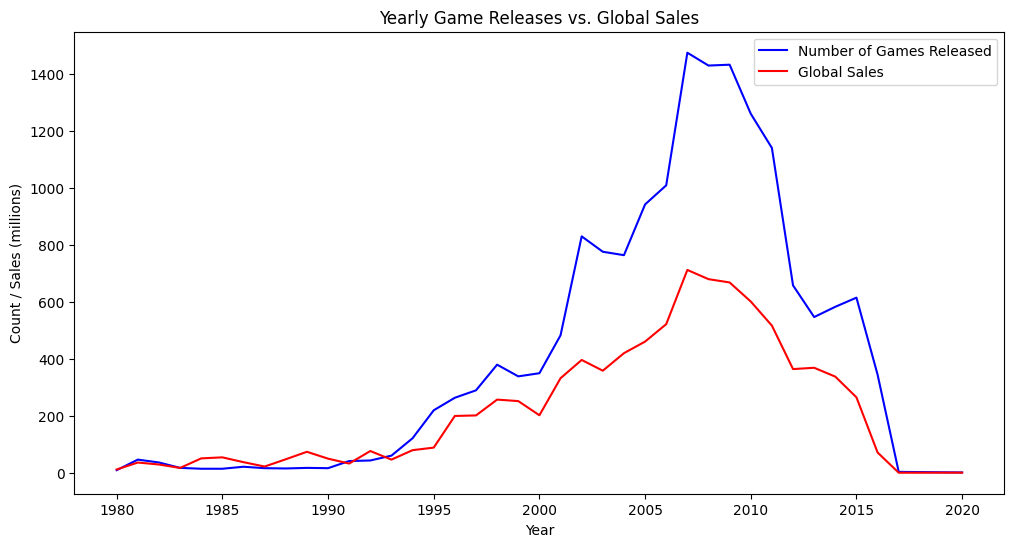

In [4]:
# Visualization: Yearly Game Releases and Sales
plt.figure(figsize=(12, 6))
vg_sales.groupby('Year').size().plot(kind='line', label='Number of Games Released', color='blue')
vg_sales.groupby('Year')['Global_Sales'].sum().plot(kind='line', label='Global Sales', color='red')
plt.title("Yearly Game Releases vs. Global Sales")
plt.xlabel("Year")
plt.ylabel("Count / Sales (millions)")
plt.legend()
plt.show()

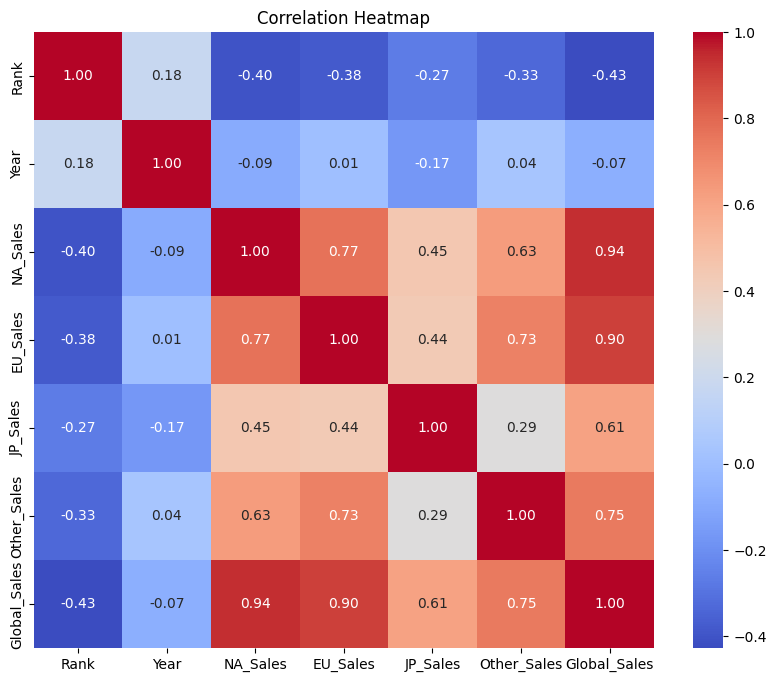

In [5]:
# Correlation heatmap to understand relationships between sales and features
plt.figure(figsize=(10, 8))
sns.heatmap(vg_sales.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
vg_sales["Rank"]
import pandas as pd

# Assuming vg_sales is the dataset and it contains the 'Rank' column

# Define the categories and their labels
rank_categories = ['Very High', 'High', 'Medium', 'Low', 'Very Low']

# Categorize 'Rank' into five categories based on quantiles
vg_sales['Rank_Category'] = pd.qcut(
    vg_sales['Rank'], 
    q=5, 
    labels=rank_categories
)

# Display the first few rows to verify the categorization
print(vg_sales[['Rank', 'Rank_Category']].head())
vg_sales["Rank_Category"]

   Rank Rank_Category
0     1     Very High
1     2     Very High
2     3     Very High
3     4     Very High
4     5     Very High


0        Very High
1        Very High
2        Very High
3        Very High
4        Very High
           ...    
16593     Very Low
16594     Very Low
16595     Very Low
16596     Very Low
16597     Very Low
Name: Rank_Category, Length: 16598, dtype: category
Categories (5, object): ['Very High' < 'High' < 'Medium' < 'Low' < 'Very Low']

/var/folders/pb/k0wlhxz53h190k4xphb1jc740000gn/T/ipykernel_53982/872661386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = X['Genre'].astype('category').cat.codes
/var/folders/pb/k0wlhxz53h190k4xphb1jc740000gn/T/ipykernel_53982/872661386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Publisher'] = X['Publisher'].astype('category').cat.codes


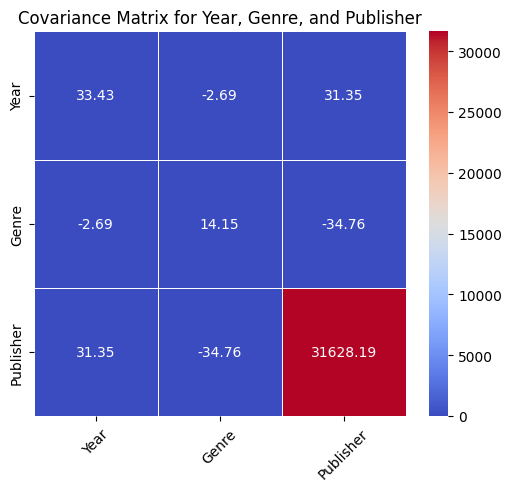

In [7]:
#Check cov for year genre publisher
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = vg_sales[['Year', 'Genre', 'Publisher']]  


X['Genre'] = X['Genre'].astype('category').cat.codes
X['Publisher'] = X['Publisher'].astype('category').cat.codes


cov_matrix = X.cov()


plt.figure(figsize=(6, 5))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix for Year, Genre, and Publisher')
plt.xticks(rotation=45)
plt.show()
# need to use qda instead of lda



In [39]:
#qda for year genre publisher
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


X = vg_sales[['Year', 'Genre', 'Publisher']]
y = vg_sales['Rank_Category']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Genre', 'Publisher'])  
    ])


qda = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('qda', QuadraticDiscriminantAnalysis())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


qda.fit(X_train, y_train)


qda_accuracy = qda.score(X_test, y_test)
print(f"QDA Accuracy: {qda_accuracy:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Accuracy: 0.2299


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       996
           1       0.95      0.96      0.96       996
           2       0.96      0.96      0.96       996
           3       0.99      0.98      0.98       996
           4       0.98      0.97      0.98       996

    accuracy                           0.97      4980
   macro avg       0.97      0.97      0.97      4980
weighted avg       0.97      0.97      0.97      4980

Confusion Matrix:
 [[968   0  19   9   0]
 [  0 954  24   0  18]
 [ 19  17 960   0   0]
 [ 23   0   0 973   0]
 [  0  30   0   0 966]]


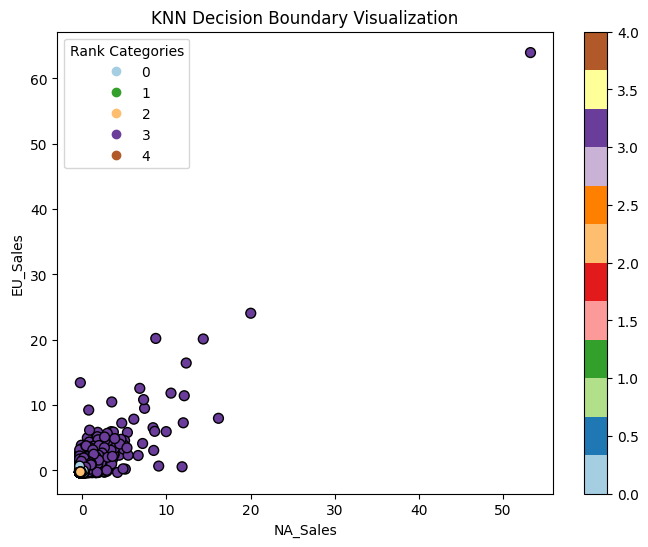

In [11]:
#Ran 5-fold KNN for predicting rank using regional sales (not sure of the decision boundary, likely more complicated than linear)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] 
y = vg_sales['Rank_Category'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolor='k', s=50)

plt.legend(*scatter.legend_elements(), title="Rank Categories")

plt.title("KNN Decision Boundary Visualization")
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")
plt.colorbar()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


qda = QuadraticDiscriminantAnalysis()


qda.fit(X_train, y_train)


y_pred = qda.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')




Confusion Matrix:
 [[615   0  57  15   0]
 [  1 630   9   0   8]
 [ 22  43 606   0   0]
 [107   0   0 553   0]
 [  0  71   0   0 583]]

Classification Report:
               precision    recall  f1-score   support

        High       0.83      0.90      0.86       687
         Low       0.85      0.97      0.91       648
      Medium       0.90      0.90      0.90       671
   Very High       0.97      0.84      0.90       660
    Very Low       0.99      0.89      0.94       654

    accuracy                           0.90      3320
   macro avg       0.91      0.90      0.90      3320
weighted avg       0.91      0.90      0.90      3320

Accuracy: 0.8997


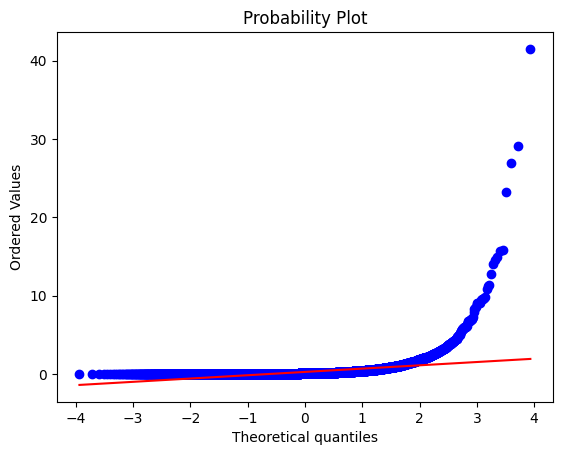

Covariance matrix for rank ('Very High', 'Year'):
 Year           47.386709
NA_Sales       -0.819626
EU_Sales        0.690366
JP_Sales       -0.965850
Other_Sales     0.387426
Name: (Very High, Year), dtype: float64
Covariance matrix for rank ('Very High', 'NA_Sales'):
 Year          -0.819626
NA_Sales       2.643672
EU_Sales       1.183160
JP_Sales       0.417504
Other_Sales    0.358034
Name: (Very High, NA_Sales), dtype: float64
Covariance matrix for rank ('Very High', 'EU_Sales'):
 Year           0.690366
NA_Sales       1.183160
EU_Sales       1.025783
JP_Sales       0.247932
Other_Sales    0.266283
Name: (Very High, EU_Sales), dtype: float64
Covariance matrix for rank ('Very High', 'JP_Sales'):
 Year          -0.965850
NA_Sales       0.417504
EU_Sales       0.247932
JP_Sales       0.413948
Other_Sales    0.054331
Name: (Very High, JP_Sales), dtype: float64
Covariance matrix for rank ('Very High', 'Other_Sales'):
 Year           0.387426
NA_Sales       0.358034
EU_Sales       0.2662

/var/folders/pb/k0wlhxz53h190k4xphb1jc740000gn/T/ipykernel_30094/1213663450.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cov is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_covariances = X.groupby(y).cov()
/var/folders/pb/k0wlhxz53h190k4xphb1jc740000gn/T/ipykernel_30094/1213663450.py:21: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = X.cov()


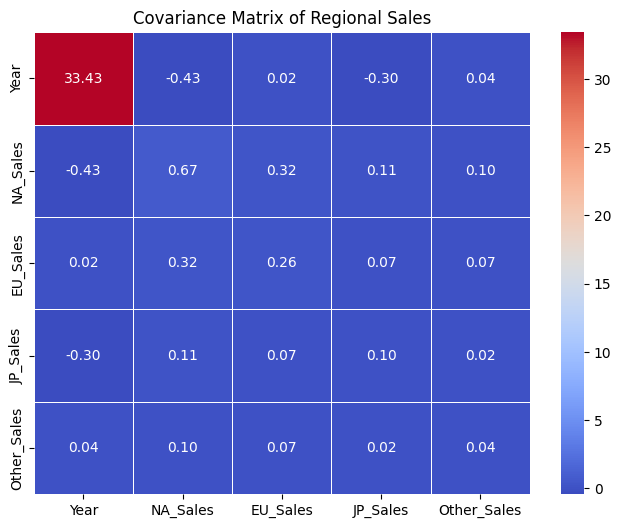

In [ ]:
# cov for regional sales
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(X['NA_Sales'], dist="norm", plot=plt)
plt.show()
import numpy as np
from sklearn.covariance import EmpiricalCovariance

class_covariances = X.groupby(y).cov()


for idx, cov_matrix in class_covariances.iterrows():
    print(f"Covariance matrix for rank {idx}:\n", cov_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cov_matrix = X.cov()


plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix of Regional Sales')
plt.show()



In [ ]:
#qda for regional sales
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  
y = vg_sales['Rank_Category']  


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


y_train_pred = qda.predict(X_train)
y_test_pred = qda.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9134
Test Accuracy: 0.9167


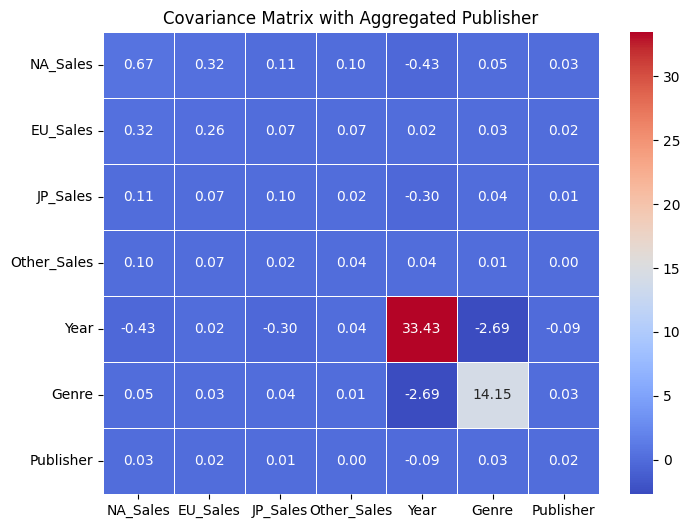

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

vg_sales_encoded = vg_sales.copy()

publisher_mean_sales = vg_sales_encoded.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
vg_sales_encoded['Publisher'] = vg_sales_encoded['Publisher'].map(publisher_mean_sales.mean(axis=1))

vg_sales_encoded['Genre'] = vg_sales_encoded['Genre'].astype('category').cat.codes

selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Genre', 'Publisher']
X_selected = vg_sales_encoded[selected_columns]

cov_matrix = X_selected.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix with Aggregated Publisher')
plt.show()


In [ ]:
# run QDA on all features (rank cat)
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

label_encoders = {}
for col in ['Genre', 'Publisher', 'Platform']:
    le = LabelEncoder()
    vg_sales[col] = le.fit_transform(vg_sales[col])
    label_encoders[col] = le

X = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Genre', 'Publisher', 'Platform']]
y = vg_sales['Rank_Category'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Very High', "High", "Medium", 'Low', 'Very Low'])
print(report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted') 


print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")



              precision    recall  f1-score   support

   Very High       0.83      0.91      0.86      1043
        High       0.87      0.96      0.91       980
      Medium       0.91      0.91      0.91       989
         Low       0.98      0.83      0.90       990
    Very Low       0.97      0.91      0.94       978

    accuracy                           0.90      4980
   macro avg       0.91      0.90      0.91      4980
weighted avg       0.91      0.90      0.90      4980

Overall Accuracy: 0.9040
Overall Precision: 0.9095
Overall Recall: 0.9040
Overall F1 Score: 0.9045


In [ ]:
#lda
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


label_encoders = {}
for col in ['Genre', 'Publisher','Platform']:
    le = LabelEncoder()
    vg_sales[col] = le.fit_transform(vg_sales[col])
    label_encoders[col] = le

X = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Genre', 'Publisher','Platform']]
y = vg_sales['Rank_Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


y_pred = lda.predict(X_test)


report = classification_report(y_test, y_pred, target_names=['Very High', "High", "Medium", 'Low', 'Very Low'])  # Replace with actual class names if needed
print(report)


              precision    recall  f1-score   support

   Very High       0.34      0.41      0.37      1043
        High       0.25      0.16      0.20       980
      Medium       0.29      0.24      0.26       989
         Low       1.00      0.53      0.69       990
    Very Low       0.32      0.56      0.41       978

    accuracy                           0.38      4980
   macro avg       0.44      0.38      0.39      4980
weighted avg       0.44      0.38      0.39      4980



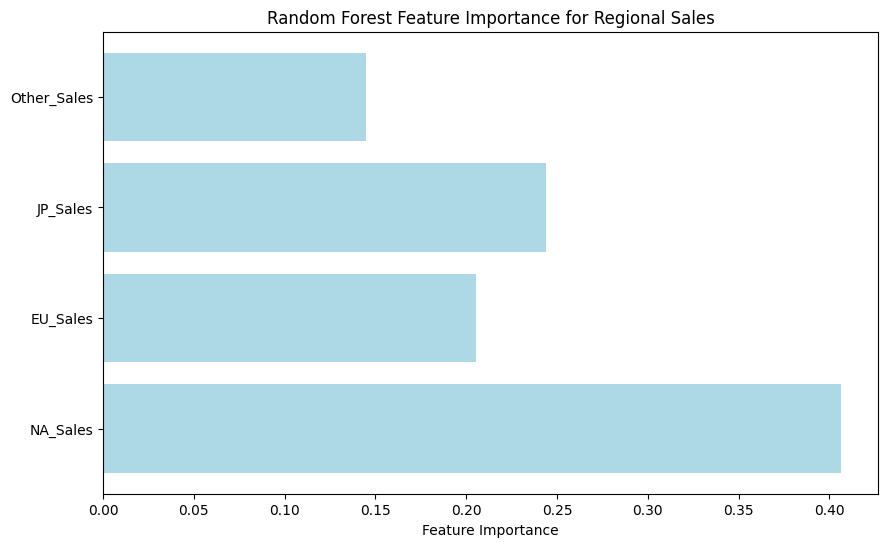

Most important features:
        Feature  Importance
0     NA_Sales    0.406386
2     JP_Sales    0.243706
1     EU_Sales    0.205123
3  Other_Sales    0.144785


In [13]:
#therefore tried to get the region that has more predictive power (likely biased, given that we dont know the customer populatin of each region)
# 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_sales = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = vg_sales['Rank_Category'] 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_sales, y_encoded, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


feature_importances = rf.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X_sales.columns, feature_importances, color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Regional Sales')
plt.show()


important_features = pd.DataFrame({
    'Feature': X_sales.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Most important features:\n", important_features)


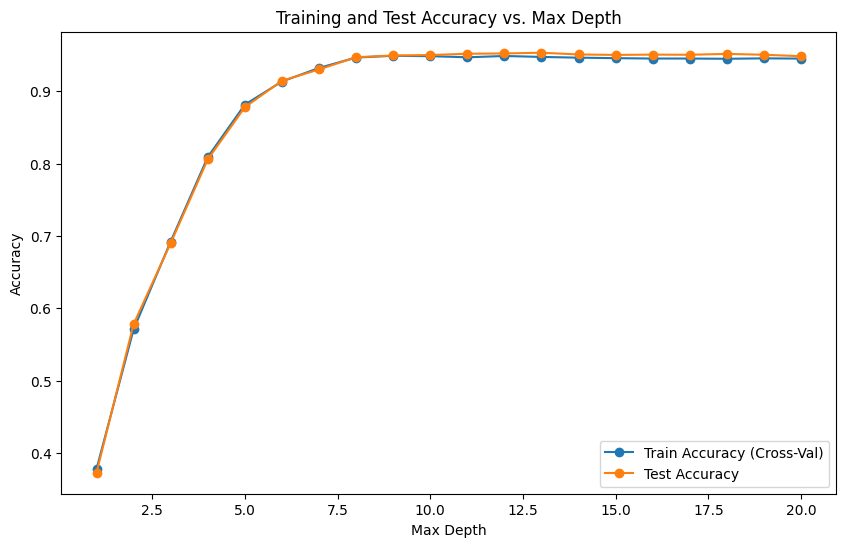

Best max depth: 13


In [ ]:
#cv for best depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Genre', 'Publisher', 'Platform']),
        ('num', 'passthrough', ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform'])
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

depth_range = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depth_range:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    train_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
    
    avg_train_accuracy = train_cv_scores.mean()
    train_accuracies.append(avg_train_accuracy)

    tree_clf.fit(X_train, y_train)
    y_test_pred = tree_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label="Train Accuracy (Cross-Val)", marker='o')
plt.plot(depth_range, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy vs. Max Depth")
plt.legend()
plt.show()

best_depth = depth_range[np.argmax(test_accuracies)]
print(f"Best max depth: {best_depth}")


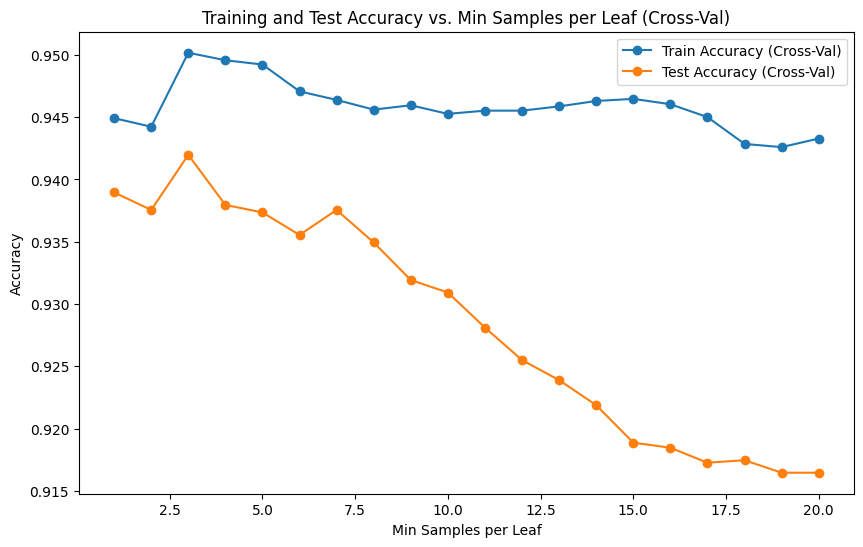

Best min_samples_leaf (based on cross-validation): 3


In [ ]:
#cv for best leaf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

leaf_range = range(1, 21)
train_scores = []
test_scores = []

for leaf in leaf_range:
    tree_clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    train_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')

    avg_train_accuracy = train_cv_scores.mean()
    train_scores.append(avg_train_accuracy)

    test_cv_scores = cross_val_score(tree_clf, X_test, y_test, cv=5, scoring='accuracy')
    
    avg_test_accuracy = test_cv_scores.mean()
    test_scores.append(avg_test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(leaf_range, train_scores, label="Train Accuracy (Cross-Val)", marker='o')
plt.plot(leaf_range, test_scores, label="Test Accuracy (Cross-Val)", marker='o')
plt.xlabel("Min Samples per Leaf")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy vs. Min Samples per Leaf (Cross-Val)")
plt.legend()
plt.show()
best_leaf_size = leaf_range[np.argmax(test_scores)]
print(f"Best min_samples_leaf (based on cross-validation): {best_leaf_size}")



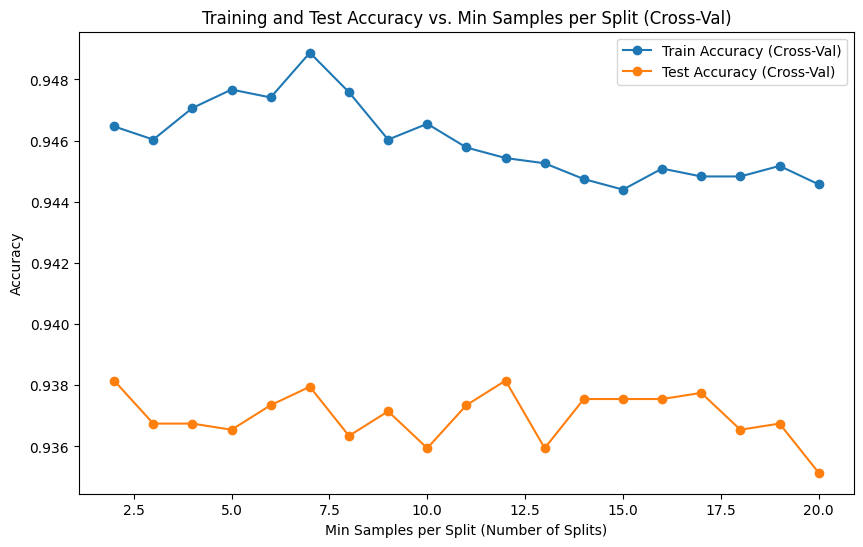

Best min_samples_split (based on cross-validation): 2


In [ ]:
#cv for best splits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


X = vg_sales[['Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Platform']]  
y = vg_sales['Rank_Category'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Genre', 'Publisher', 'Platform']),  
        ('num', 'passthrough', ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

split_range = range(2, 21)
train_scores = []
test_scores = []

for min_samples_split in split_range:
    tree_clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    
    train_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
    
    avg_train_accuracy = train_cv_scores.mean()
    train_scores.append(avg_train_accuracy)
    
    test_cv_scores = cross_val_score(tree_clf, X_test, y_test, cv=5, scoring='accuracy')
    
    avg_test_accuracy = test_cv_scores.mean()
    test_scores.append(avg_test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(split_range, train_scores, label="Train Accuracy (Cross-Val)", marker='o')
plt.plot(split_range, test_scores, label="Test Accuracy (Cross-Val)", marker='o')
plt.xlabel("Min Samples per Split (Number of Splits)")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy vs. Min Samples per Split (Cross-Val)")
plt.legend()
plt.show()

best_split = split_range[np.argmax(test_scores)]
print(f"Best min_samples_split (based on cross-validation): {best_split}")



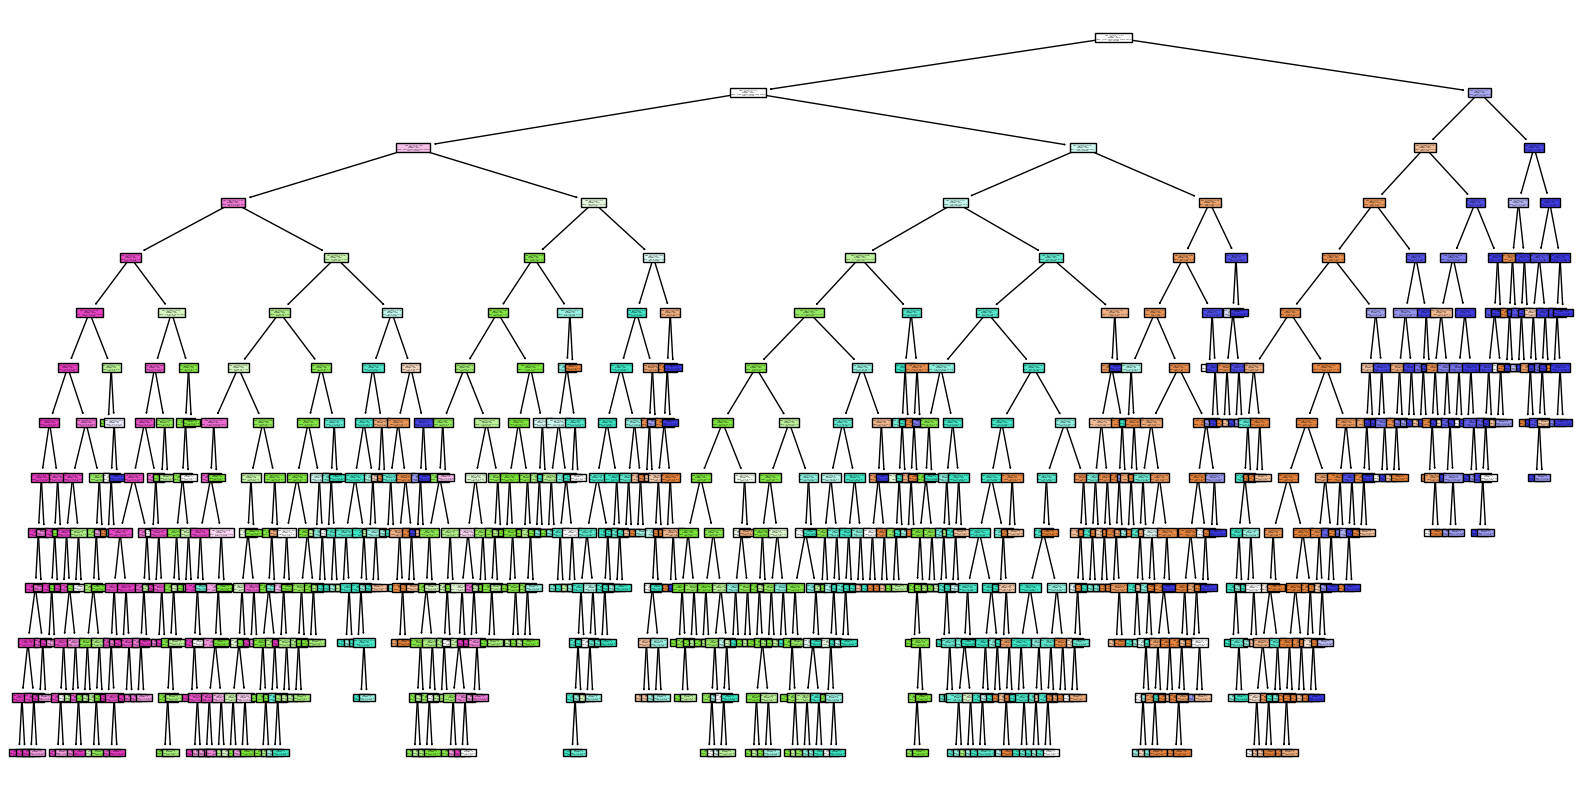

Accuracy: 0.9783
Precision: 0.9783
Recall: 0.9783
F1 Score: 0.9783
Feature: cat__Genre_0, Importance: 0.0007
Feature: cat__Genre_1, Importance: 0.0003
Feature: cat__Genre_2, Importance: 0.0002
Feature: cat__Genre_3, Importance: 0.0003
Feature: cat__Genre_4, Importance: 0.0003
Feature: cat__Genre_5, Importance: 0.0002
Feature: cat__Genre_6, Importance: 0.0000
Feature: cat__Genre_7, Importance: 0.0002
Feature: cat__Genre_8, Importance: 0.0003
Feature: cat__Genre_9, Importance: 0.0002
Feature: cat__Genre_10, Importance: 0.0007
Feature: cat__Genre_11, Importance: 0.0002
Feature: cat__Publisher_0, Importance: 0.0000
Feature: cat__Publisher_1, Importance: 0.0000
Feature: cat__Publisher_2, Importance: 0.0000
Feature: cat__Publisher_3, Importance: 0.0000
Feature: cat__Publisher_4, Importance: 0.0000
Feature: cat__Publisher_5, Importance: 0.0000
Feature: cat__Publisher_6, Importance: 0.0000
Feature: cat__Publisher_7, Importance: 0.0000
Feature: cat__Publisher_8, Importance: 0.0000
Feature: cat_

In [ ]:
#decision tree (pruned)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt


X = vg_sales[['Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Platform']]
y = vg_sales['Rank_Category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Genre', 'Publisher']),
        ('num', 'passthrough', ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

tree_clf = DecisionTreeClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=2, random_state=123)
tree_clf.fit(X_preprocessed, y_encoded)

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=label_encoder.classes_)
plt.show()

y_pred = tree_clf.predict(X_preprocessed)

accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred, average='weighted')
recall = recall_score(y_encoded, y_pred, average='weighted')
f1 = f1_score(y_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
importances = tree_clf.feature_importances_
features = preprocessor.get_feature_names_out()

for feat, imp in zip(features, importances):
    print(f"Feature: {feat}, Importance: {imp:.4f}")


